In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [22]:
file_path = 'CarPrice_Assignment.csv'
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-

In [24]:
#preprocessing 

# Drop unnecessary columns
data = data.drop(columns=['car_ID', 'CarName'])

In [5]:
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-

In [6]:
# Handle categorical variables using Label Encoding

categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

In [7]:
# Splitting features and target variable

X = data.drop(columns=['price'])
y = data['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data Preprocessing Completed!")


Data Preprocessing Completed!


In [8]:
# Initialize models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()}

model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
   
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    model_performance[model_name] = {"R2 Score": r2, "MSE": mse, "MAE": mae}
    print(f"\n{model_name}:")
    print(f"R2 Score: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")


performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Summary:")
print(performance_df)





Linear Regression:
R2 Score: 0.7983838478445058
Mean Squared Error: 15916389.725439575
Mean Absolute Error: 2526.4074501434266

Decision Tree:
R2 Score: 0.9002445186663295
Mean Squared Error: 7875098.801265586
Mean Absolute Error: 1939.138219512195

Random Forest:
R2 Score: 0.957858926292672
Mean Squared Error: 3326785.802642497
Mean Absolute Error: 1292.9702357723577

Gradient Boosting:
R2 Score: 0.9275422048207606
Mean Squared Error: 5720109.695523835
Mean Absolute Error: 1667.525102198733

Support Vector Regressor:
R2 Score: -0.09995143262001083
Mean Squared Error: 86834588.8633635
Mean Absolute Error: 5695.576436854142

Model Performance Summary:
                          R2 Score           MSE          MAE
Linear Regression         0.798384  1.591639e+07  2526.407450
Decision Tree             0.900245  7.875099e+06  1939.138220
Random Forest             0.957859  3.326786e+06  1292.970236
Gradient Boosting         0.927542  5.720110e+06  1667.525102
Support Vector Regressor -0.09

In [9]:
# Feature importance for Random Forest (or the best tree-based model)


best_tree_model = RandomForestRegressor(random_state=42)
best_tree_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

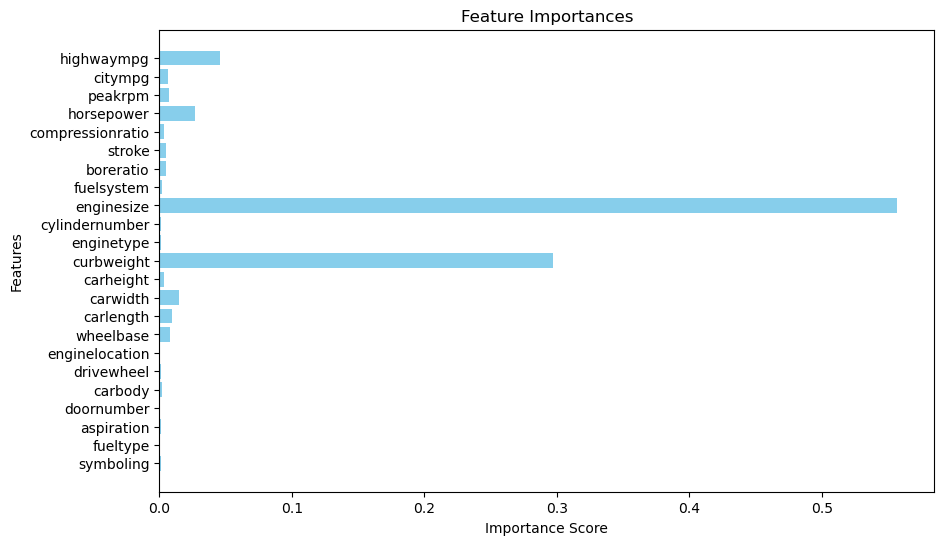

Feature Importance Analysis Completed!


In [10]:
# Plot feature importance

importances = best_tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

print("Feature Importance Analysis Completed!")

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


param_grid = {'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}

print("Starting GridSearchCV for Random Forest...")

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("GridSearchCV completed!")


best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_rf = grid_search.best_estimator_


y_pred_tuned = best_rf.predict(X_test)


r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)




Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
GridSearchCV completed!
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [47]:
print("\nPerformance After Tuning:")
print(f"R2 Score: {r2_tuned:.4f}")
print(f"Mean Squared Error: {mse_tuned:.4f}")
print(f"Mean Absolute Error: {mae_tuned:.4f}")


Performance After Tuning:
R2 Score: 0.9444
Mean Squared Error: 4392265.5358
Mean Absolute Error: 1467.4068
